In [1]:
#author: Robert Shava
#Title: SDG indicator 14.5.1 Coverage of protected areas in relation to marine areas

In [2]:
#import libraries
import geopandas as gpd
import pandas as pd
from pandas import DataFrame, merge
import numpy as np
import matplotlib.pyplot as plt
import shapely
%matplotlib inline

In [3]:
#specify input file location
ctry20 = r'R:\ROBERT\2020\SDG1451\Data\Countries_Dec2020_UK_BFC.shp' #uk country boundary
kba = r'R:\ROBERT\2020\SDG1451\Data\kba.shp' #key biodiveristy areas
#wdpa19 = r'R:\ROBERT\2020\SDG1451\Data\WDPA19uk_TerrNoSCIfinal.shp' #protected areas
wdpa210 = r'R:\ROBERT\2020\WorldDatabaseProtectedAreas2021\WDPA_May2021_GBR_0\WDPA_WDOECM_May2021_Public_GBR_shp-polygons.shp'
wdpa211 = r'R:\ROBERT\2020\WorldDatabaseProtectedAreas2021\WDPA_May2021_GBR_1\WDPA_WDOECM_May2021_Public_GBR_shp-polygons.shp'
wdpa212 = r'R:\ROBERT\2020\WorldDatabaseProtectedAreas2021\WDPA_May2021_GBR_2\WDPA_WDOECM_May2021_Public_GBR_shp-polygons.shp'

In [4]:
# read in data as geodataframes using geopandas
# important sites for biodiveristy (KBAs)
# protected areas
# country boundary
ctry20_gdf = gpd.read_file(ctry20)
kba_gdf = gpd.read_file(kba)
wdpa210_gdf = gpd.read_file(wdpa210)
wdpa211_gdf = gpd.read_file(wdpa211)
wdpa212_gdf = gpd.read_file(wdpa212)

DriverError: R:\ROBERT\2020\SDG1451\Data\Countries_Dec2020_UK_BFC.shp: No such file or directory

In [5]:
#check crs
#ctry20_gdf.crs
#kba_gdf.crs
wdpa210_gdf.crs
wdpa211_gdf.crs
wdpa212_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
#reproject to BNG EPSG:27700
wdpa210_gdf.crs= "EPSG:27700"
wdpa211_gdf.crs= "EPSG:27700"
wdpa212_gdf.crs= "EPSG:27700"
#wdpa210_gdf.crs

In [7]:
#check crs projection
print(ctry20_gdf.crs)
print(kba_gdf.crs)
print(wdpa210_gdf.crs)
print(wdpa210_gdf.crs)
print(wdpa210_gdf.crs)

epsg:27700
epsg:27700
EPSG:27700
EPSG:27700
EPSG:27700


<ipython-input-8-c609857eeb9f>:2: UserWarning: `keep_geom_type=True` in overlay resulted in 176 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  wdpa21_gdf = gpd.overlay(wdpa210_gdf, wdpa211_gdf, how='union')


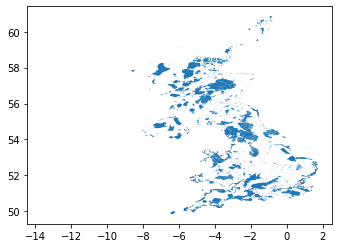

In [8]:
#merge wdpa 
wdpa21_gdf = gpd.overlay(wdpa210_gdf, wdpa211_gdf, how='union')
wdpa21_gdf.plot()
plt.show()

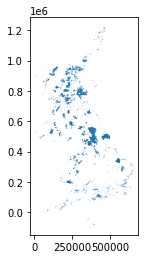

In [11]:
#test if geodataframe is read correctly by plotting
kba_gdf.plot()
plt.show()

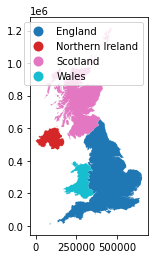

In [12]:
ctry20_gdf.head()
ctry20_gdf.plot(column = 'CTRY20NM', legend = True)
plt.show()

In [8]:
#convert kba dataframe into a geodataframe and reproject to BNG
kba_gdf  = gpd.GeoDataFrame(kba,
                              geometry=gpd.points_from_xy(kba.Longitude, 
                                                          kba.Latitude), crs = 'EPSG:27700')

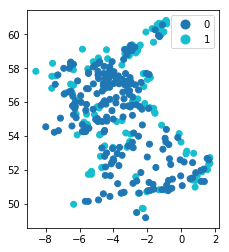

In [16]:
kba_gdf.plot(column='Marine_IBA', categorical = True, legend = True)

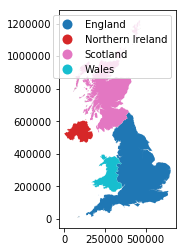

In [30]:
#read in uk boundary shapefile
ukb = gpd.read_file(r'R:\ROBERT\SDGs\SDG14marines\SDG1451\Data\Countries_(December_2019)_Boundaries_UK_BFC.shp')
ukb.plot(column = 'ctry19nm', legend = True)

In [31]:
# reproject to BNG
ukb = ukb.to_crs('EPSG:27700')


<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [22]:
kba_gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
ukb = kba.

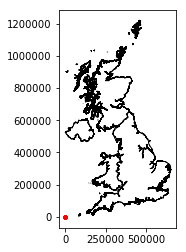

In [33]:
base = ukb.plot(color='white', edgecolor='black')

kba_gdf.plot(ax=base, marker='o', color='red', markersize=5);